             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD WDstdev     BP Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1     0.0  998.0        0            0.0   26.3   26.2   
1      0.0    0.0     0.0  998.0        0            0.0   26.3   26.2   
2      0.5  124.6     1.5  997.0        0            0.0   26.4   26.2   
3      0.4  120.3     1.3  997.0        0            0.0   26.4   26.3   
4      0.3  113.2     1.0  997.0        0            0.0   26.4   26.3   

   Comments Country GHIrsi  
0       NaN   Benin    NaN  
1       NaN   Benin    NaN  

<Figure size 800x600 with 0 Axes>

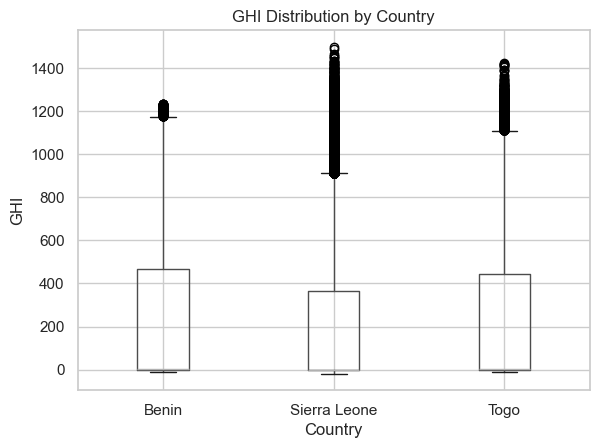

<Figure size 800x600 with 0 Axes>

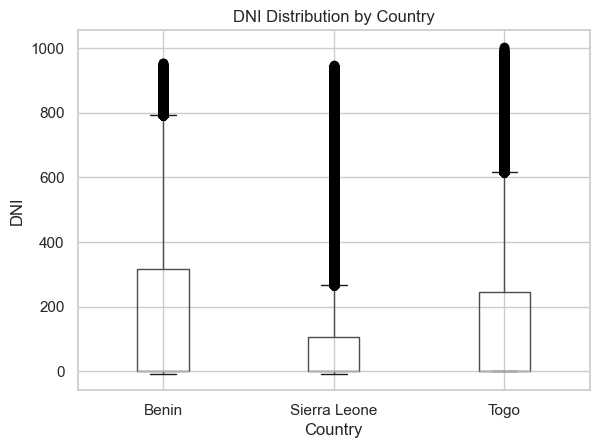

<Figure size 800x600 with 0 Axes>

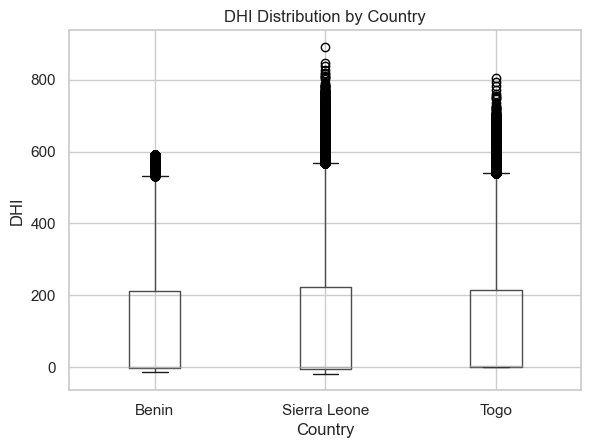

ANOVA F-statistic: 1762.352, p-value: 0.00000
- Benin shows the highest median GHI, indicating strong solar potential.
- Sierra Leone has the lowest median GHI, but less variability than Togo.
- Togo's GHI fluctuates more widely, suggesting seasonal or regional variation.


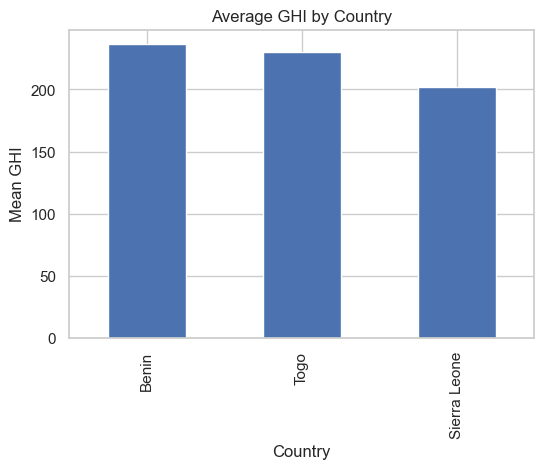

In [17]:
import pandas as pd

# ---------------------------
# Step 1: Load cleaned data
# ---------------------------

# Read CSVs with proper encoding and avoid DtypeWarning
benin = pd.read_csv('../data/benin_clean.csv', encoding='cp1252', low_memory=False)
sierra = pd.read_csv('../data/sierra_leone_clean.csv', encoding='cp1252', low_memory=False)
togo = pd.read_csv('../data/togo_clean.csv', encoding='cp1252', low_memory=False)

# ---------------------------
# Step 2: Add 'Country' column
# ---------------------------
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# ---------------------------
# Step 3: Combine all countries
# ---------------------------
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

# ---------------------------
# Step 4: Ensure numeric columns are numeric
# ---------------------------
numeric_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 
                'WS', 'WSgust', 'WSstdev', 'BP', 'TModA', 'TModB', 'Precipitation']

for col in numeric_cols:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce')  # invalid entries become NaN

# ---------------------------
# Step 5: Preview combined dataset
# ---------------------------
print(df_all.head())
print("\nDataset shape:", df_all.shape)
print("\nColumns types:\n", df_all.dtypes)


import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']

for metric in metrics:
    plt.figure(figsize=(8, 6))
    df_all.boxplot(column=metric, by='Country')
    plt.title(f'{metric} Distribution by Country')
    plt.suptitle('')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.show()
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary
from scipy import stats

# Convert GHI, DNI, DHI to numeric again just to be safe
for col in ['GHI', 'DNI', 'DHI']:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce')
ghi_benin = df_all[df_all['Country'] == 'Benin']['GHI'].dropna()
ghi_sierra = df_all[df_all['Country'] == 'Sierra Leone']['GHI'].dropna()
ghi_togo = df_all[df_all['Country'] == 'Togo']['GHI'].dropna()


from scipy import stats

f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.5f}")
observations = [
    "Benin shows the highest median GHI, indicating strong solar potential.",
    "Sierra Leone has the lowest median GHI, but less variability than Togo.",
    "Togo's GHI fluctuates more widely, suggesting seasonal or regional variation."
]

# Print observations
for obs in observations:
    print("-", obs)

avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
avg_ghi.plot(kind='bar')
plt.title('Average GHI by Country')
plt.ylabel('Mean GHI')
plt.xlabel('Country')
plt.show()